# Exploring the DGGRID tool via Python

[![Population Gridded](day-04-hexa.png)](https://twitter.com/allixender/status/1324055326111485959)

## DGGRIDv7

DGGRID is available under the GNU AFFERO GENERAL PUBLIC LICENSE

[DGGRID](https://www.discreteglobalgrids.org/software/) is a free software program for creating and manipulating Discrete Global Grids created and maintained by Kevin Sahr. DGGRID version 7.0 was released in September, 2019.

- [DGGRID Version 7.0 on GitHub](https://github.com/sahrk/DGGRID)
- [DGGRID User Manual](https://webpages.sou.edu/~sahrk/docs/dggridManualV70.pdf)


## dggrid4py - a Python library to run highlevel functions of DGGRID

https://github.com/allixender/dggrid4py

You need the ddgrid tool compiled available on the system.

Besides some lowlevel access influence the dggrid operations' metafile creation, a few highlevel functions are integrated to work with the more comfortable geopython libraries, like shapely and geopandas

- grid_cell_polygons_for_extent(): fill extent/subset with cells at resolution (clip or world)
- grid_cell_polygons_from_cellids(): geometry_from_cellid for dggs at resolution (from id list)
- grid_cellids_for_extent(): get_all_indexes/cell_ids for dggs at resolution (clip or world)
- cells_for_geo_points(): poly_outline for point/centre at resolution

In [29]:
import os
from dggrid4py import DGGRIDv7

In [30]:
dggrid_exec = "/Users/akmoch/bin/dggrid83"

In [31]:
dggrid = DGGRIDv7(executable=dggrid_exec, working_dir=os.curdir, capture_logs=True, silent=True)

In [36]:
import geopandas as gpd
from shapely.geometry import box, Point, Polygon

In [37]:
extent = gpd.read_file('/Users/akmoch/Nextcloud/shared_work/ut_work/supervision/aleksandra_rammul_dggs_scale_metrics/data/alutaguse_extent_4326.geojson')

In [38]:
alutaguse = extent['geometry'].loc[0]

In [39]:
gdf1 = dggrid.grid_cell_polygons_for_extent('IGEO7', 9, clip_geom=alutaguse, output_address_type='Z7')

/Users/akmoch/micromamba/envs/dggrid/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver FlatGeobuf does not support open option DRIVER
  return ogr_read(


In [42]:
gdf1.crs = 4326

In [28]:
gdf1.to_file('/Users/akmoch/Nextcloud/shared_work/ut_work/supervision/aleksandra_rammul_dggs_scale_metrics/data/alutag_igeo7_res_14.gpkg',
           driver='GPKG')

In [27]:
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8268350 entries, 0 to 8268349
Data columns (total 2 columns):
 #   Column    Dtype   
---  ------    -----   
 0   name      object  
 1   geometry  geometry
dtypes: geometry(1), object(1)
memory usage: 126.2+ MB


In [21]:
gdf1.to_csv('/Users/akmoch/Nextcloud/shared_work/ut_work/supervision/aleksandra_rammul_dggs_scale_metrics/data/alutag_igeo7_res_14.gpkg',
           index=None)

<Axes: >

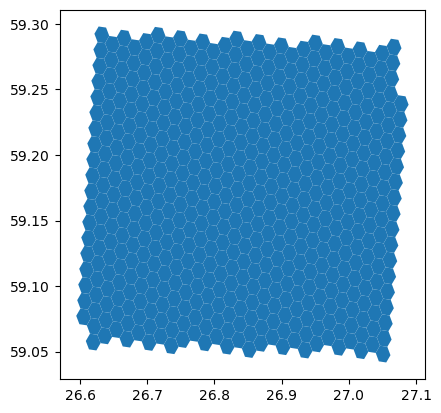

In [43]:
gdf1.plot()

In [44]:
cell_id = '00010256351'

In [45]:
# quad number and (i, j) coordinates on that quad
df_q2di = dggrid.address_transform([cell_id], 'IGEO7', 9, input_address_type='Z7_STRING', output_address_type='Q2DI')
print(df_q2di.head(3))

     Z7_STRING          Q2DI
0  00010256351  4 2124 16605


In [50]:
# quad number and (i, j) coordinates on that quad
df_q2di = dggrid.address_transform(pd.DataFrame({ 0: [4], [2124], [16605]}), 'IGEO7', 9, input_address_type='Q2DI', output_address_type='Z7_STRING')
print(df_q2di.head(3))

ValueError: some error happened under the hood of dggrid (exit code 1): ** executing DGGRID version 8.33 with GDAL version 3090300 **
type sizes: big int: 64 bits / big double: 64 bits

** using meta file metafile_62a23427-3944-44da-9b00-c8dcf182446b...
* parameter values:
dggrid_operation TRANSFORM_POINTS (user set)
rng_type RAND (default)
precision 7 (default)
verbosity 0 (default)
pause_on_startup false (default)
pause_before_exit false (default)
update_frequency 100000 (default)
dggs_type IGEO7 (user set)
dggs_topology HEXAGON (user set)
dggs_proj ISEA (user set)
dggs_aperture_type PURE (user set)
dggs_aperture 7 (user set)
proj_datum WGS84_AUTHALIC_SPHERE (default)
dggs_orient_specify_type SPECIFIED (user set)
dggs_num_placements 1 (user set)
dggs_vert0_lon 11.25 (user set)
dggs_vert0_lat 58.2825 (user set)
dggs_vert0_azimuth 0 (user set)
dggs_res_specify_type SPECIFIED (user set)
dggs_res_spec 9 (user set)
input_files vals.txt (default)
input_file_name /Users/akmoch/dev/build/dggs_t1_presi/temp_in_Q2DI_4366dd6d-befc-4f9f-a642-d611fe01231b.txt (user set)
point_input_file_type TEXT (default)
input_address_type Q2DI (user set)
input_delimiter " " (user set)
output_file_name /Users/akmoch/dev/build/dggs_t1_presi/temp_out_Z7_STRING_4366dd6d-befc-4f9f-a642-d611fe01231b.txt (user set)
output_file_type TEXT (default)
output_address_type Z7_STRING (user set)
output_delimiter " " (user set)
densification 0 (default)
longitude_wrap_mode WRAP (default)
unwrap_points true (default)
output_cell_label_type OUTPUT_ADDRESS_TYPE (user set)
cell_output_type NONE (default)
point_output_type NONE (default)
randpts_output_type NONE (default)
cell_output_gdal_format GeoJSON (default)
point_output_gdal_format GeoJSON (default)
collection_output_gdal_format GeoJSON (default)
cell_output_file_name cells (default)
point_output_file_name centers (default)
randpts_output_file_name randPts (default)
collection_output_file_name cells (default)
dggs_orient_output_file_name grid.meta (default)
shapefile_id_field_length 11 (default)
kml_default_width 4 (default)
kml_default_color ffffffff (default)
kml_name  (default)
kml_description Generated by DGGRID 8.33 (default)
neighbor_output_type NONE (default)
neighbor_output_file_name nbr (default)
children_output_type NONE (default)
children_output_file_name chld (default)
max_cells_per_output_file 0 (default)
output_first_seqnum 1 (default)
output_last_seqnum 18446744073709551615 (default)

Res 9 DGG Statistics (calculated in projection space):
total #cells: 403,536,072
approximate intercell distance: 1.1103832 km
average hex cell area: 1.2639902 km^2
characteristic length scale: 1.2686064 km


transforming values...
FATAL ERROR: DgQ2DIRF::fromString() invalid input

In [46]:
# quad number and (x, y) coordinates on that quad
df_q2dd = dggrid.address_transform([cell_id], 'IGEO7', 9, input_address_type='Z7_STRING', output_address_type='Q2DD')
print(df_q2dd.head(3))

     Z7_STRING                  Q2DD
0  00010256351  4 -0.367615 0.855617


In [47]:
 # PROJTRI - triangle number and (x, y) coordinates within that triangle on the ISEA plane
df_tri = dggrid.address_transform([cell_id], 'IGEO7', 9, input_address_type='Z7_STRING', output_address_type='PROJTRI')
print(df_tri.head(3))

     Z7_STRING              PROJTRI
0  00010256351  3 0.557179 0.746172


In [48]:
# 'VERTEX2DD', # vertex number, triangle number, and (x, y) coordinates on ISEA plane
df_tri = dggrid.address_transform([cell_id], 'IGEO7', 9, input_address_type='Z7_STRING', output_address_type='VERTEX2DD')
print(df_tri.head(3))

     Z7_STRING                    VERTEX2DD
0  00010256351  4 0 keep -0.367615 0.855617


In [17]:
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
%matplotlib inline

gv.extension('matplotlib')

gv.output(fig='png', size=300)

ModuleNotFoundError: No module named 'geoviews'

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
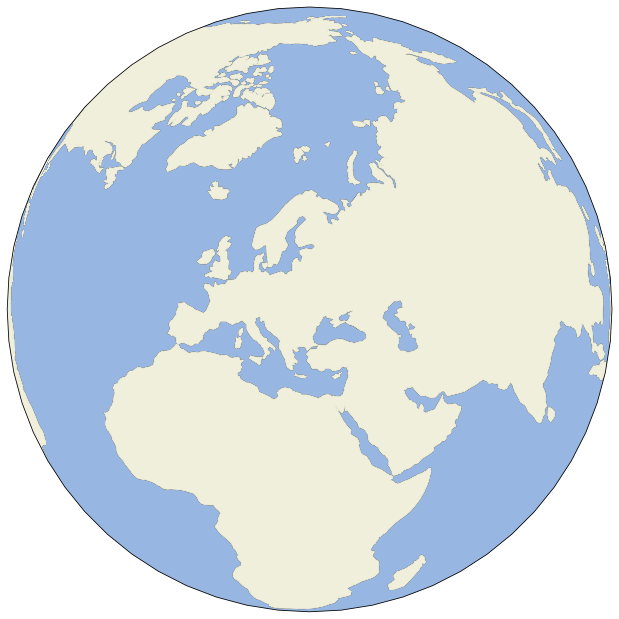

In [19]:
(gf.ocean * gf.coastline * gf.land).opts( projection=ccrs.Orthographic(27, 48) )

/home/akmoch/.local/lib/python3.10/site-packages/geoviews/operation/projection.py:99: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if proj_geom.geom_type == 'GeometryCollection' and len(proj_geom) == 0:


:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
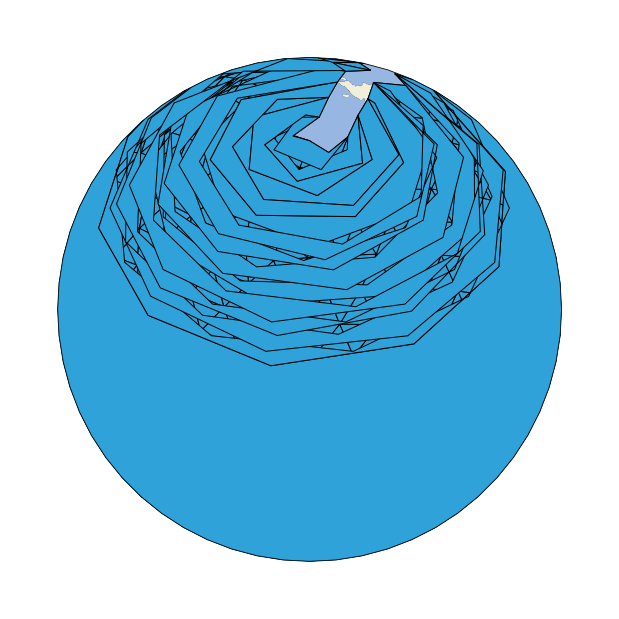

In [20]:
gf.ocean * gf.coastline * gf.land * gv.Polygons(
    gdf1, vdims=[]
).opts( projection=ccrs.Orthographic(27, 48) )

In [21]:
from typing import Union, List
from shapely.geometry import mapping, Polygon, GeometryCollection
from shapely import affinity

# https://towardsdatascience.com/around-the-world-in-80-lines-crossing-the-antimeridian-with-python-and-shapely-c87c9b6e1513
# https://gist.github.com/PawaritL/ec7136c0b718ca65db6df1c33fd1bb11

def check_crossing(lon1: float, lon2: float, validate: bool = True):
    """
    Assuming a minimum travel distance between two provided longitude coordinates,
    checks if the 180th meridian (antimeridian) is crossed.
    """
    if validate and any(abs(x) > 180.0 for x in [lon1, lon2]):
        raise ValueError("longitudes must be in degrees [-180.0, 180.0]")   
    return abs(lon2 - lon1) > 180.0

def check_for_geom(geom):
    crossed = False
    p_init = geom.exterior.coords[0]

    for p in range(1, len(geom.exterior.coords)):
        px = geom.exterior.coords[p]
        # print(px)

        if check_crossing(p_init[0], px[0]):
            crossed = True
        p_init = px
    
    return crossed


In [22]:
gdf1['crossed'] = gdf1['geometry'].apply(check_for_geom)

In [23]:
gdf1 = gdf1.loc[gdf1['crossed'] == False]

/home/akmoch/.local/lib/python3.10/site-packages/geoviews/operation/projection.py:99: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if proj_geom.geom_type == 'GeometryCollection' and len(proj_geom) == 0:


:Polygons   [Longitude,Latitude]
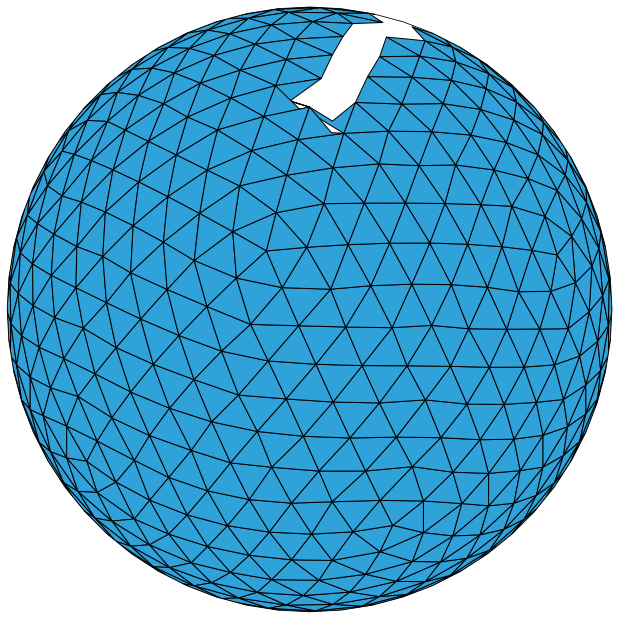

In [24]:
gv.Polygons(
    gdf1, vdims=[]
).opts( projection=ccrs.Orthographic(27, 48) )

:Polygons   [Longitude,Latitude]
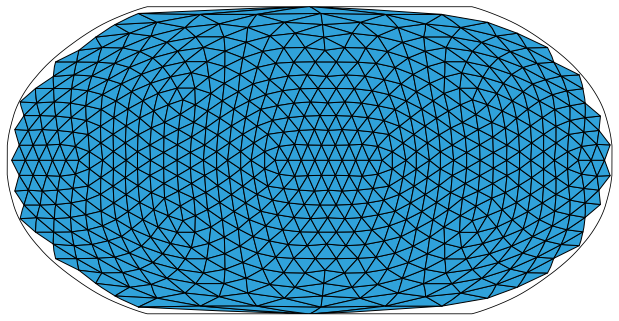

In [25]:
gv.Polygons(gdf1, vdims=[]).opts(projection=ccrs.Robinson() )